In [5]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
student_data = pd.read_csv("Expanded_data_with_more_features.csv")
student_data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [11]:
student_data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [17]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [21]:
student_data.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [53]:
student_data = student_data.drop("Unnamed: 0",axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [37]:
student_data["WklyStudyHours"].value_counts()
student_data["WklyStudyHours"] = student_data["WklyStudyHours"].str.replace('5-Oct','5 - 10')
student_data["WklyStudyHours"].value_counts()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

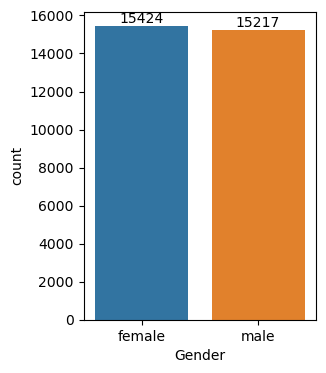

In [51]:
#gender distribution
#analysis female>male
plt.figure(figsize=(3,4))
ax= sns.countplot(data=student_data,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [61]:
#parenteduc impact onstudent score
df = student_data.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
df

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


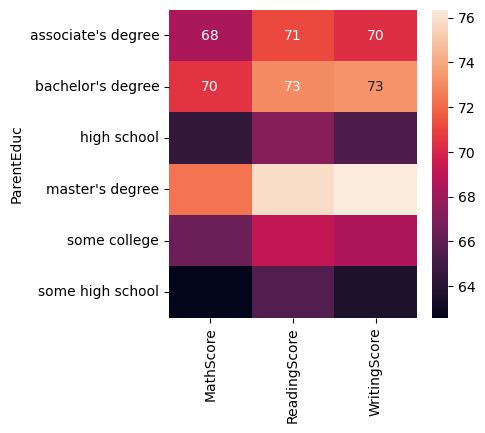

In [73]:
plt.figure(figsize=(4,4))
sns.heatmap(df,annot=True)
plt.show()
#kids with parent having better  education scores high

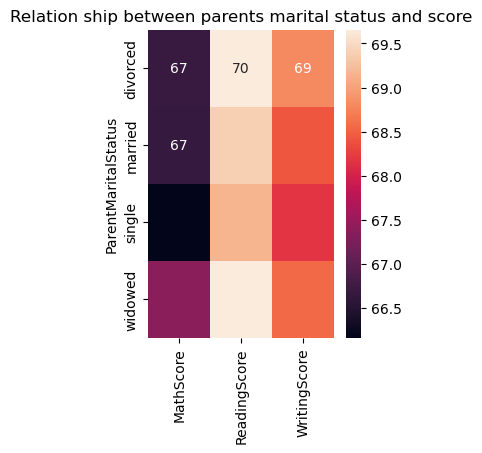

In [79]:
#parentmarital impact onstudent score
df = student_data.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
df
plt.figure(figsize=(3,4))
sns.heatmap(df,annot=True)
plt.title("Relation ship between parents marital status and score")
plt.show()
#kids parent's marital status does not have much impact on their score

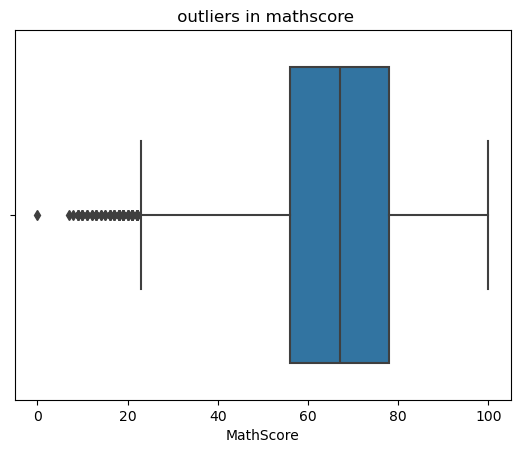

In [131]:
sns.boxplot(student_data,x="MathScore")
plt.title(" outliers in mathscore")
plt.show()

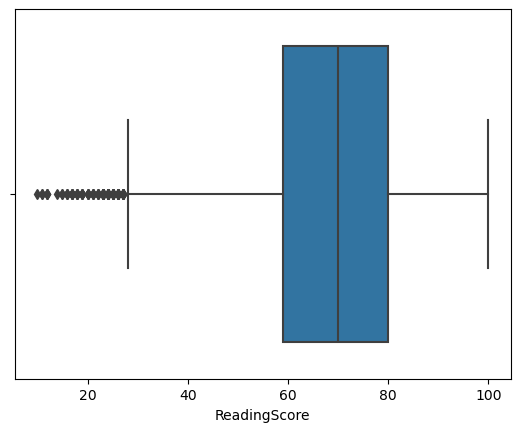

In [95]:
sns.boxplot(student_data,x="ReadingScore")
plt.show()

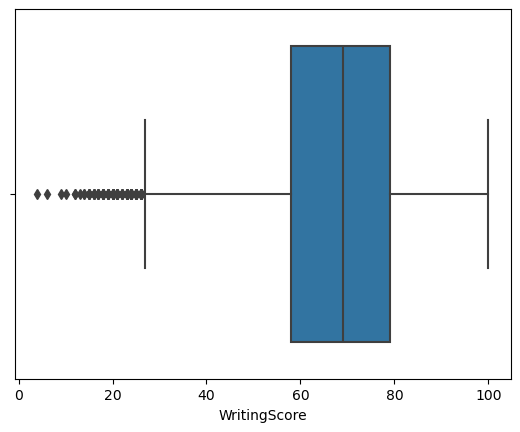

In [97]:
sns.boxplot(student_data,x="WritingScore")
plt.show()

In [99]:
#create a piechart to get the count of students of each ethnic group
student_data["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

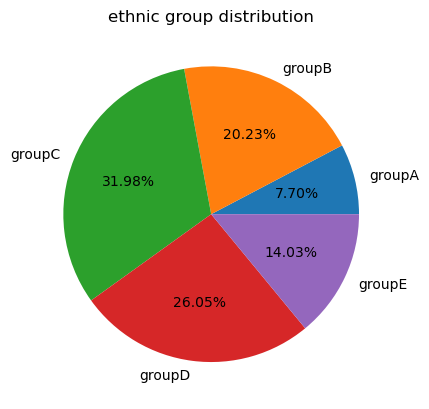

In [119]:
groupA = student_data.loc[(student_data["EthnicGroup"]=='group A')].count()
groupB = student_data.loc[(student_data["EthnicGroup"]=='group B')].count()
groupC = student_data.loc[(student_data["EthnicGroup"]=='group C')].count()
groupD = student_data.loc[(student_data["EthnicGroup"]=='group D')].count()
groupE = student_data.loc[(student_data["EthnicGroup"]=='group E')].count()
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
l=["groupA","groupB","groupC","groupD","groupE"]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("ethnic group distribution")
plt.show()

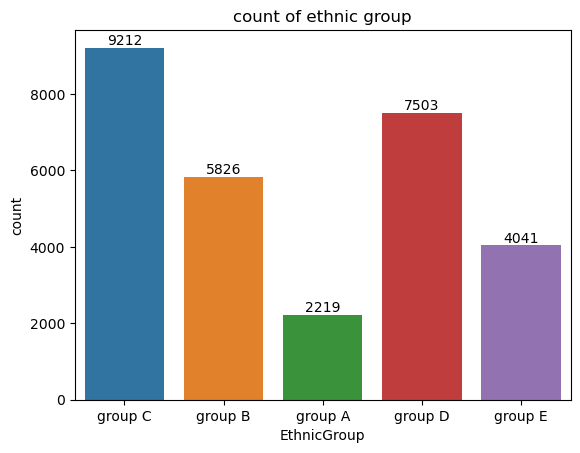

In [129]:
ax=sns.countplot(data=student_data,x="EthnicGroup")
ax.bar_label(ax.containers[0])
plt.title("count of ethnic group")
plt.show()

In [127]:
print(mlist)

[2219, 5826, 9212, 7503, 4041]
